### Introduction

In this part of the analysis, we build upon the clustering results obtained in the first step, where we identified groups using the best-performing clustering method for this dataset. We then compared two algorithms, Random Forest and Gradient Boosting, to develop an effective classification algorithm capable of assigning individuals to the identified groups based on their responses. Random Forest was chosen for its robustness, interpretability, and ability to handle diverse data types, while Gradient Boosting was selected for its strong predictive performance and capacity to capture non-linear relationships. Finally, we optimized the number of questions used in the classification process by analyzing feature importance and iteratively reducing the feature set to achieve the best trade-off between performance and simplicity. This step ensures that the resulting algorithm remains both efficient and accurate, providing a practical solution for future use with minimal inputs.

## IMPORT ##

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer



## Data Loading ##

In [2]:
file_path = "fic_epita_kantar_codes.csv"
data_codes = pd.read_csv(file_path, sep=';')

**Select relevant columns**

In [3]:
# Select relevant columns
columns_of_interest = [
    "A11", "A12", "A13", "A14", "A4", "A5", "A5bis",
    "A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice",
    "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice",
    "B3", "B4", "B6",
    "C1_1_slice", "C1_2_slice", "C1_3_slice", "C1_4_slice",
    "C1_5_slice", "C1_6_slice", "C1_7_slice", "C1_8_slice", "C1_9_slice"
]
subset_data = data_codes[columns_of_interest]

## Adding the cluster column using the best algo with the best number of cluster found in part 1 ##

In [4]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data.fillna(0))  # Replace missing values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
subset_data['cluster'] = kmeans_labels


/tmp/ipykernel_207096/1714191391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['cluster'] = kmeans_labels


## Training Random Forest ##

In [5]:
# Define features (golden questions) and target (clusters)
X = subset_data.drop(columns=['cluster'])
y = subset_data['cluster']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       108
           1       0.96      0.99      0.98       538
           2       0.94      0.81      0.87        93
           3       0.98      0.99      0.98       261

    accuracy                           0.96      1000
   macro avg       0.95      0.91      0.93      1000
weighted avg       0.96      0.96      0.96      1000



## Training Gradient Boosting ##

In [6]:
# Define features (questions) and target (clusters)
X2 = subset_data.drop(columns=['cluster'])
y2 = subset_data['cluster']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X2_imputed = imputer.fit_transform(X2)

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_imputed, y2, test_size=0.2, random_state=42)

# Train and evaluate model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train2, y_train2)
y_pred2 = gb.predict(X_test2)
print("Classification Report:\n", classification_report(y_test2, y_pred2))



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       108
           1       0.97      0.99      0.98       538
           2       0.94      0.87      0.91        93
           3       0.98      0.99      0.99       261

    accuracy                           0.97      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.97      0.97      0.97      1000



## Getting the importance of each question ##

**For random forest**

In [7]:
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Top Questions) for Random Forest:\n", importance_df)

Feature Importance (Top Questions) for Random Forest:
        Feature  Importance
4           A4    0.137382
6        A5bis    0.124918
5           A5    0.124324
9   A8_3_slice    0.084954
8   A8_2_slice    0.060560
7   A8_1_slice    0.059688
0          A11    0.050347
21  C1_4_slice    0.042480
24  C1_7_slice    0.041330
23  C1_6_slice    0.031081
10  A8_4_slice    0.030162
25  C1_8_slice    0.029449
1          A12    0.027443
20  C1_3_slice    0.025814
18  C1_1_slice    0.017167
22  C1_5_slice    0.016838
26  C1_9_slice    0.016687
19  C1_2_slice    0.013562
17          B6    0.012354
16          B4    0.010607
15          B3    0.009742
13  B2_1_slice    0.009590
14  B2_2_slice    0.007714
12  B1_2_slice    0.006305
11  B1_1_slice    0.006281
2          A13    0.003221
3          A14    0.000000


**For Gradient Boosting**

In [8]:
feature_importance2 = gb.feature_importances_
importance_df2 = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': feature_importance2
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Top Questions) for Gradiant Boosting:\n", importance_df2)

Feature Importance (Top Questions) for Gradiant Boosting:
        Feature  Importance
4           A4    0.473199
9   A8_3_slice    0.103731
21  C1_4_slice    0.096608
7   A8_1_slice    0.095942
24  C1_7_slice    0.042156
8   A8_2_slice    0.040218
23  C1_6_slice    0.031291
20  C1_3_slice    0.023079
25  C1_8_slice    0.020325
26  C1_9_slice    0.012862
18  C1_1_slice    0.011572
10  A8_4_slice    0.009906
22  C1_5_slice    0.008562
17          B6    0.006149
13  B2_1_slice    0.005680
15          B3    0.005298
19  C1_2_slice    0.003005
16          B4    0.002910
14  B2_2_slice    0.002247
12  B1_2_slice    0.001462
5           A5    0.001038
11  B1_1_slice    0.000937
6        A5bis    0.000926
0          A11    0.000605
1          A12    0.000169
2          A13    0.000124
3          A14    0.000000


## Finding performance when lowering question amount ##

**For random forest**

In [9]:
results = []
for i in range(1, len(importance_df) + 1):
    top_features = importance_df['Feature'].head(i)
    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]
    
    rf_reduced = RandomForestClassifier(random_state=42)
    rf_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = rf_reduced.predict(X_test_reduced)
    
    acc = accuracy_score(y_test, y_pred_reduced)
    results.append({'Num_Features': i, 'Accuracy': acc})

results_df = pd.DataFrame(results)
print(results_df)

    Num_Features  Accuracy
0              1     0.799
1              2     0.799
2              3     0.799
3              4     0.864
4              5     0.863
5              6     0.868
6              7     0.865
7              8     0.911
8              9     0.918
9             10     0.926
10            11     0.933
11            12     0.938
12            13     0.937
13            14     0.941
14            15     0.946
15            16     0.943
16            17     0.955
17            18     0.954
18            19     0.954
19            20     0.959
20            21     0.959
21            22     0.958
22            23     0.960
23            24     0.961
24            25     0.965
25            26     0.959
26            27     0.960


**For Gradient Boosting**

In [13]:
# Ensure X2 is a DataFrame with proper column names
X2_imputed_df = pd.DataFrame(X2_imputed, columns=X2.columns)

results2 = []

# Loop through 1 to the total number of features
for i in range(1, len(importance_df2) + 1):
    # Get the top `i` features as a list
    top_features2 = importance_df2['Feature'].head(i).tolist()
    
    # Reduce the training and test data to the top `i` features
    X_train_reduced2 = X_train2[:, [X2.columns.get_loc(f) for f in top_features2]]
    X_test_reduced2 = X_test2[:, [X2.columns.get_loc(f) for f in top_features2]]
    
    # Train the Gradient Boosting model
    gb_reduced = GradientBoostingClassifier(random_state=42)
    gb_reduced.fit(X_train_reduced2, y_train2)
    
    # Predict and calculate accuracy
    y_pred_reduced2 = gb_reduced.predict(X_test_reduced2)
    acc = accuracy_score(y_test2, y_pred_reduced2)
    
    # Append the results
    results2.append({'Num_Features': i, 'Accuracy': acc})

# Convert results to a DataFrame for visualization
results_df2 = pd.DataFrame(results2)
print(results_df2)


    Num_Features  Accuracy
0              1     0.799
1              2     0.864
2              3     0.909
3              4     0.911
4              5     0.920
5              6     0.922
6              7     0.930
7              8     0.932
8              9     0.939
9             10     0.943
10            11     0.949
11            12     0.951
12            13     0.951
13            14     0.950
14            15     0.962
15            16     0.966
16            17     0.964
17            18     0.966
18            19     0.970
19            20     0.973
20            21     0.971
21            22     0.971
22            23     0.971
23            24     0.971
24            25     0.973
25            26     0.971
26            27     0.973


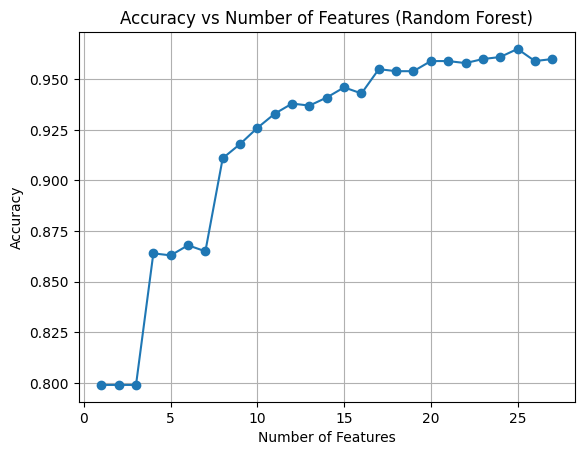

In [14]:
plt.plot(results_df['Num_Features'], results_df['Accuracy'], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features (Random Forest)")
plt.grid()
plt.show()

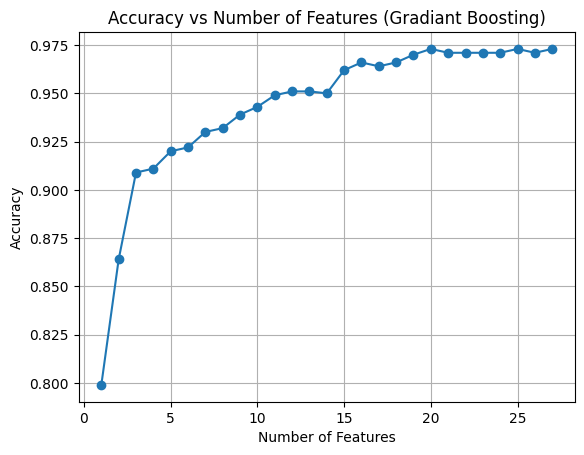

In [15]:
plt.plot(results_df2['Num_Features'], results_df2['Accuracy'], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features (Gradiant Boosting)")
plt.grid()
plt.show()


### Conclusion

Gradient Boosting is better then Random Forest for this task with better results. Therefore, the optimal choice is Gradient Boosting.

Using just 15 features results in an accuracy nearing 97%, striking the best balance between performance and complexity. Beyond that, the improvements in accuracy become minimal, and the model starts to slow down, making it the optimal choice for maximizing classification performance while maintaining efficiency.